In [572]:
from __future__ import annotations
import networkx as nx
import matplotlib.pyplot as plt
from celluloid import Camera
from dataclasses import dataclass
from typing import Union, Self, Callable, List
from random import randint
from math import inf
from queue import PriorityQueue

In [573]:
GRAPH_SEED: int = 1
DRAWING_SEED: int = 1
DIRECTED_GRAPH: bool = False

In [574]:
class Graph:
    def __init__(self, g: Union[nx.Graph, None]=None) -> None:
        if g is None:
            self.g: nx.Graph = nx.Graph()
        else:
            self.g: nx.Graph = g

    @classmethod
    def create_example_graph(cls: type[Graph]) -> Graph:
        g = nx.erdos_renyi_graph(6, 0.5, seed=GRAPH_SEED, directed=DIRECTED_GRAPH)
        for (u, v) in g.edges():
            g.edges[u,v]['weight'] = randint(1,10)
        return cls(g)

    @dataclass
    class FunctionOutput:
        visited: set
        parents: dict
        
        def __repr__(self) -> str:
            return "".join([f"{parent} -> {node}\n" for node, parent in self.parents.items()])
    
    @staticmethod
    def bfs(g: nx.Graph, start: int) -> Graph.FunctionOutput:
        queue: list = [start]
        visited: set = {start}
        parents: dict = {}
        while queue:
            print(f"Queue: {queue}")
            node: int = queue.pop(0)
            print(f"Current node: {node}")
            for neighbour in g.neighbors(node):
                if neighbour not in visited:
                    visited.add(neighbour)
                    parents[neighbour] = node
                    queue.append(neighbour)
        return Graph.FunctionOutput(visited, parents)
    

    @staticmethod
    def dfs(g: nx.Graph, start: int, visited: set=set(), parents: dict={}) -> Graph.FunctionOutput:
        visited.add(start)
        print(f"Visited: {visited}")
        print(f"Current node: {start}")
        for node in g.neighbors(start):
            if node not in visited:
                parents[node] = start
                return Graph.dfs(g, node, visited, parents)
        return Graph.FunctionOutput(visited, parents)
    
    @staticmethod
    def cost(g, node1, node2) -> float:
        return g.get_edge_data(node1,node2).get('weight')
    
    @staticmethod
    def djikstra(g: nx.Graph, start: int):
        pred = {v: -1 for v in g.nodes()}
        dist = {v: inf for v in g.nodes()}
        dist[start] = 0
        pq = PriorityQueue()
        for node, value in dist.items():
            pq.put((value, node))
        nodes = [x[1] for x in pq.queue]
        while not pq.empty():
            cost, node = pq.get()
            for neighbour in g.neighbors(node):
                path = dist[node] + Graph.cost(g, node, neighbour)
                if path < dist[neighbour]:
                    print(f"Found new path to {neighbour} with cost {path}")
                    dist[neighbour] = path
                    pred[neighbour] = node
        print(dist)

    
    def draw(self: Self, node_colors: Union[List[str], None]=None) -> None:
        node_colors = node_colors or ['white' for node in self.g.nodes()]
        elarge = [(u, v) for (u, v, d) in self.g.edges(data=True) if d["weight"] > 0.5]
        esmall = [(u, v) for (u, v, d) in self.g.edges(data=True) if d["weight"] <= 0.5]
        #pos = nx.spring_layout(self.g, seed=DRAWING_SEED)
        pos = nx.shell_layout(self.g)
        nx.draw_networkx_nodes(self.g, pos, node_size=700, node_color=node_colors)
        nx.draw_networkx_edges(self.g, pos, edgelist=elarge, width=3)
        nx.draw_networkx_edges(
            self.g, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
        )
        nx.draw_networkx_labels(self.g, pos, font_size=20, font_family="sans-serif")
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels)
        ax = plt.gca()
        ax.margins(0.08)
        plt.axis("off")
        plt.tight_layout()
        
    def draw_function(self: Self, start: int, function_to_draw: Callable [[nx.Graph, int], Graph.FunctionOutput]) -> None:
            fig = plt.figure()
            camera = Camera(fig)
            self.plots = []
            function_ouput = function_to_draw(self.g, start)
            print(f"Path:\n{function_ouput}")
            tmp = []
            for i in function_ouput.visited:
                tmp.append(i)
                colors = ['r' if node in tmp else 'white' for node in self.g.nodes() ]
                self.draw(node_colors=colors)
                camera.snap()
            camera.animate().save(f'{function_to_draw.__name__}.gif', writer='imagemagick', fps=1)
    
    

In [575]:
graph = Graph.create_example_graph()

In [576]:
#graph.draw_function(0, Graph.bfs)

In [577]:
#graph.draw_function(0, Graph.dfs)

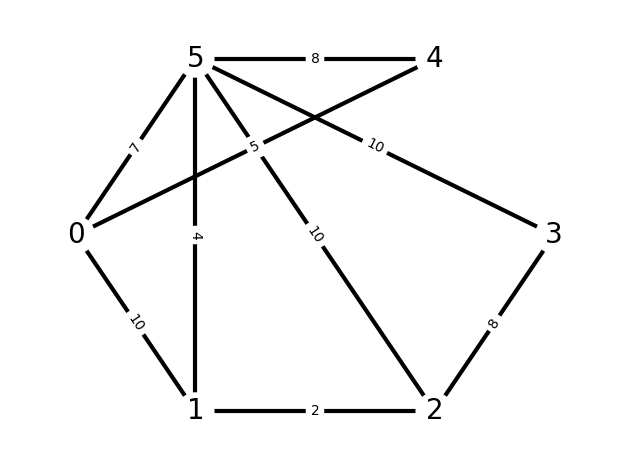

In [578]:
graph.draw()

In [579]:
Graph.djikstra(graph.g, 0)

Found new path to 1 with cost 10
Found new path to 4 with cost 5
Found new path to 5 with cost 7
Found new path to 2 with cost 12
Found new path to 3 with cost 20
Found new path to 3 with cost 17
{0: -1, 1: 0, 2: 1, 3: 5, 4: 0, 5: 0}
{0: 0, 1: 10, 2: 12, 3: 17, 4: 5, 5: 7}
